## Personality Type Distribution

Hi! This notebook is meant to find the personality type distribution for each category in https://www.personality-database.com. 

These include:

1.   [MBTI (Myers–Briggs Type Indicator)](#mbti)
2.   [Enneagram](#enneagram)
3.   [Socionics](#socionics)
4.   [Instinctual variants](#instVar)
5.   [Four Temperaments](#fourTemp)
6.   [Atitudinal Psyche](#attPsych) 
7.   [Big Five](#bigFive)

Click the category you want to check out above!

### Libraries and Helpers

In [ ]:
!pip install requests
!pip install matplotlib

import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from textwrap import wrap

>Json Formatter:

In [2]:
def printjson(obj):
    text = json.dumps(obj, indent=4)
    print(text)

> Function to sort the types in decreasing order from the type with the most profiles to the one with the least:

In [3]:
def sortedCounter(begin, end):
    return dict(
        sorted(list(counter.items())[begin:end],
               key=lambda x: x[1], reverse=True)
    )

<a name="Definitions"></a>
### Definitions

>The default API call will only return the first 250 profiles, due to some previous research, I fount out that no type has more than 10000 profiles so we set 10000 as the maximum.

In [4]:
parameters = {
    "per_page":10000
}

>Each of the personality types has an API endpoint corresponding to a number. We create a dictionary so we can reference it.

In [5]:
dictionary = {
    1: "ISTJ", 2: "ESTJ", 3: "ISFJ", 4: "ESFJ",
    5: "ESFP", 6: "ISFP", 7: "ESTP", 8: "ISTP",
    9: "INFJ", 10: "ENFJ", 11: "INFP", 12: "ENFP",
    13: "INTP", 14: "ENTP", 15: "INTJ", 16: "ENTJ",
    17: "1w2", 18: "1w9", 19: "2w1", 20: "2w3",
    21: "3w2", 22: "3w4", 23: "4w3", 24: "4w5",
    25: "5w4", 26: "5w6", 27: "6w5", 28: "6w7",
    29: "7w6", 30: "7w8", 31: "8w7", 32: "8w9",
    33: "9w8", 34: "9w1",
    35: "LII", 36: "LSI", 37: "ESI", 38: "EII",
    39: "IEE", 40: "SEE", 41: "SLE", 42: "ILE",
    43: "ESE", 44: "EIE", 45: "LIE", 46: "LSE",
    47: "SEI", 48: "IEI", 49: "ILI", 50: "SLI",
    60: "so/sp", 61: "sp/so", 62: "sx/so",
    63: "so/sx", 64: "sx/sp", 65: "sp/sx",
    90: "Choleric [Dominant]", 91: "Melancholic [Dominant]",
    92: "Phlegmatic [Dominant]", 93: "Sanguine [Dominant]",
    101: "Choleric-Melancholic", 102: "Choleric-Phelgmatic",
    103: "Choleric-Sanguine", 104: "Melancholic-Choleric",
    105: "Melancholic-Phlegmatic", 106: "Melancholic-Sanguine",
    107: "Phlegmatic-Choleric", 108: "Phlegmatic-Melancholic",
    109: "Phlegmatic-Sanguine", 110: "Sanguine-Choleric",
    111: "Sanguine-Melancholic", 112: "Sanguine-Phelgmatic",
    248: "FVLE", 249: "FLVE", 250: "EVLF", 251: "ELVF",
    252: "LVFE", 253: "LFVE", 254: "EVFL", 255: "EFVL",
    256: "VLFE", 257: "VFLE", 258: "ELFV", 259: "EFLV",
    260: "VFEL", 261: "VEFL", 262: "LFEV", 263: "LEFV",
    264: "VLEF", 265: "VELF", 266: "FLEV", 267: "FELV",
    268: "LVEF", 269: "LEVF", 270: "FVEL", 271: "FEVL",
    272: "RCOAI", 273: "RCOAN", 274: "RLOAN", 275: "RLOAI",
    276: "RLUAI", 277: "RLUAN", 278: "RCUAN", 279: "RCUAI",
    280: "RCOEI", 281: "RCOEN", 282: "RLOEN", 283: "RLOEI",
    284: "RLUEI", 285: "RLUEN", 286: "RCUEN", 287: "RCUEI",
    288: "SCOAI", 289: "SCOAN", 290: "SLOAN", 291: "SLOAI",
    292: "SLUAI", 293: "SLUAN", 294: "SCUAN", 295: "SCUAI",
    296: "SCOEI", 297: "SCOEN", 298: "SLOEN", 299: "SLOEI",
    300: "SLUEI", 301: "SLUEN", 302: "SCUEN", 303: "SCUEI"
}


> Here we define the positions each category takes in the dictionary:

In [6]:
mbtiCountBegin = 0
mbtiCountEnd = 16
enneagramCountBegin = 16
enneagramCountEnd = 34
socionicsCountBegin = 34
socionicsCountEnd = 50
instVarCountBegin = 50
instVarCountEnd = 56
fourTempCountBegin = 56
fourTempCountEnd = 72
attPsychCountBegin = 72
attPsychCountEnd = 96
bigFiveCountBegin = 96
bigFiveCountEnd = 128

### Visualizations


>Get some pastel colors:

In [7]:
cmap = get_cmap("Pastel1")
colors = cmap.colors

>Function to show a Bar Plot:

In [8]:
def showBarPlot(sortedCounter, category, rotation=0):
    fig = plt.figure(figsize=(25, 10))
    keys =['\n'.join(wrap(x, 12)) for x in  list(
        sortedCounter.keys())]
    plt.bar(range(len(sortedCounter)), list(
        sortedCounter.values()), color=colors)
    plt.xticks(range(len(sortedCounter)), keys, rotation=rotation)
    plt.ylabel("Profiles")
    plt.xlabel(f"{category} types")
    plt.show()


>Function to show a Pie Chart:

In [9]:
def func(pct, allvals):
    absolute = int(round(pct / 100.0 * np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


def showPieChart(sortedCounter, category):
    fig = plt.figure(figsize=(15, 15))
    wedges, texts, autotexts = plt.pie(
        list(sortedCounter.values()),
        labels=sortedCounter.keys(),
        autopct=lambda pct: func(pct, list(sortedCounter.values())),
        textprops=dict(color="w"),
        colors=colors,
    )

    plt.legend(
        wedges,
        sortedCounter.keys(),
        title=f"{category} Types",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=8, weight="bold")
    plt.show()


### Counter

>Code to count the profiles for each type:

In [10]:
counter = {}

for num, personality in dictionary.items():
    count = 0
    res = requests.get(
        f"https://api.personality-database.com/api/v1/search_by_type/{num}",
        params=parameters
    )

    for item in res.json()["items"]:
        count += 1

    counter[personality] = count


<a name="mbti"></a>

## 1. MBTI Type Distribution

In [11]:
sortedMbtiCounter=sortedCounter(mbtiCountBegin,mbtiCountEnd)

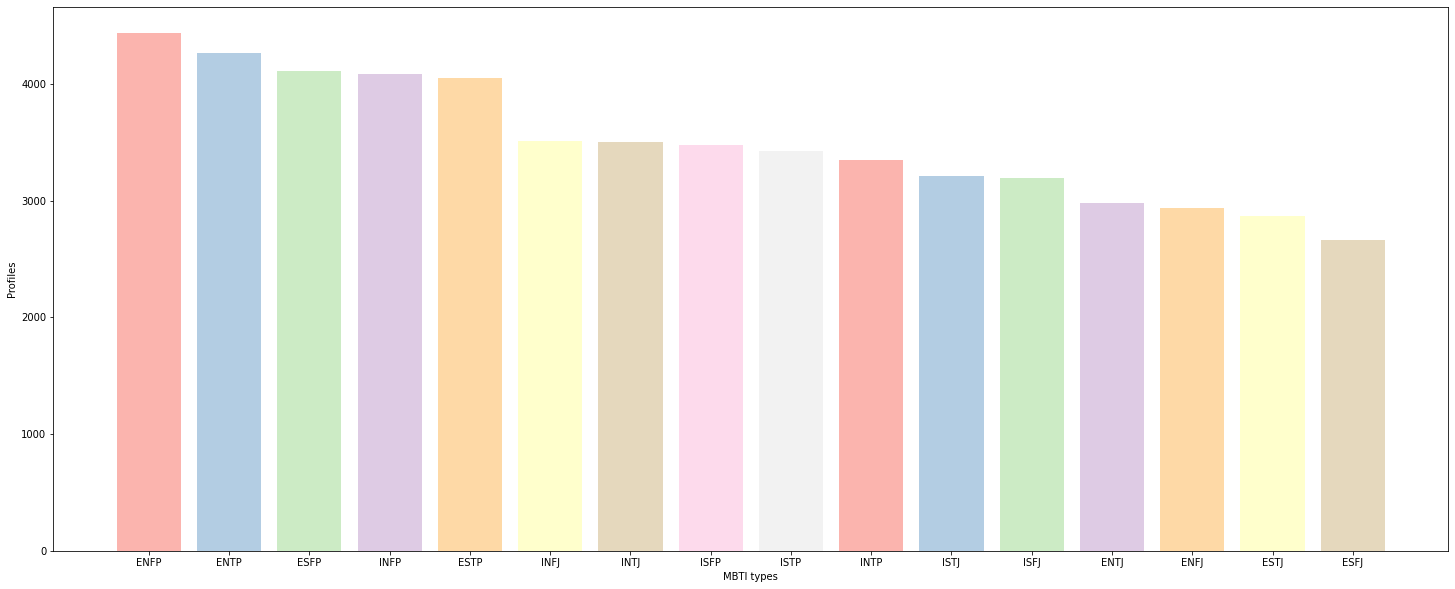

In [12]:
showBarPlot(sortedMbtiCounter,"MBTI")

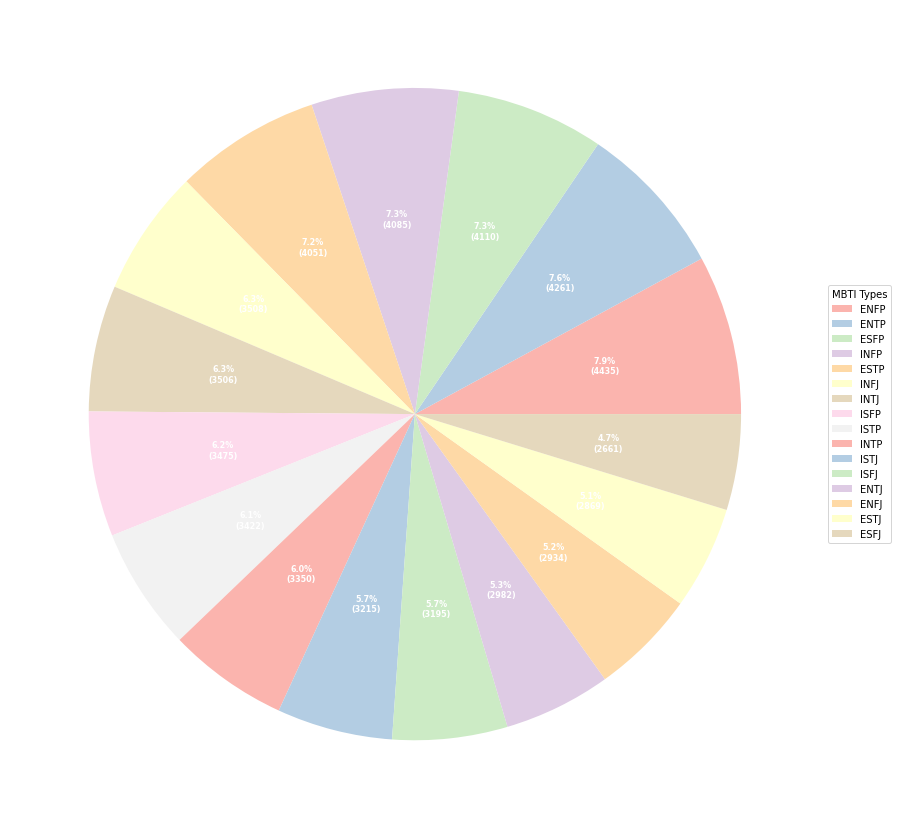

In [13]:
showPieChart(sortedMbtiCounter,"MBTI")

<a name="enneagram"></a>

## 2. Enneagram Type Distribution


>**Note**: This is the version with wings.

In [14]:
sortedEnneagramCounter=sortedCounter(enneagramCountBegin,enneagramCountEnd)

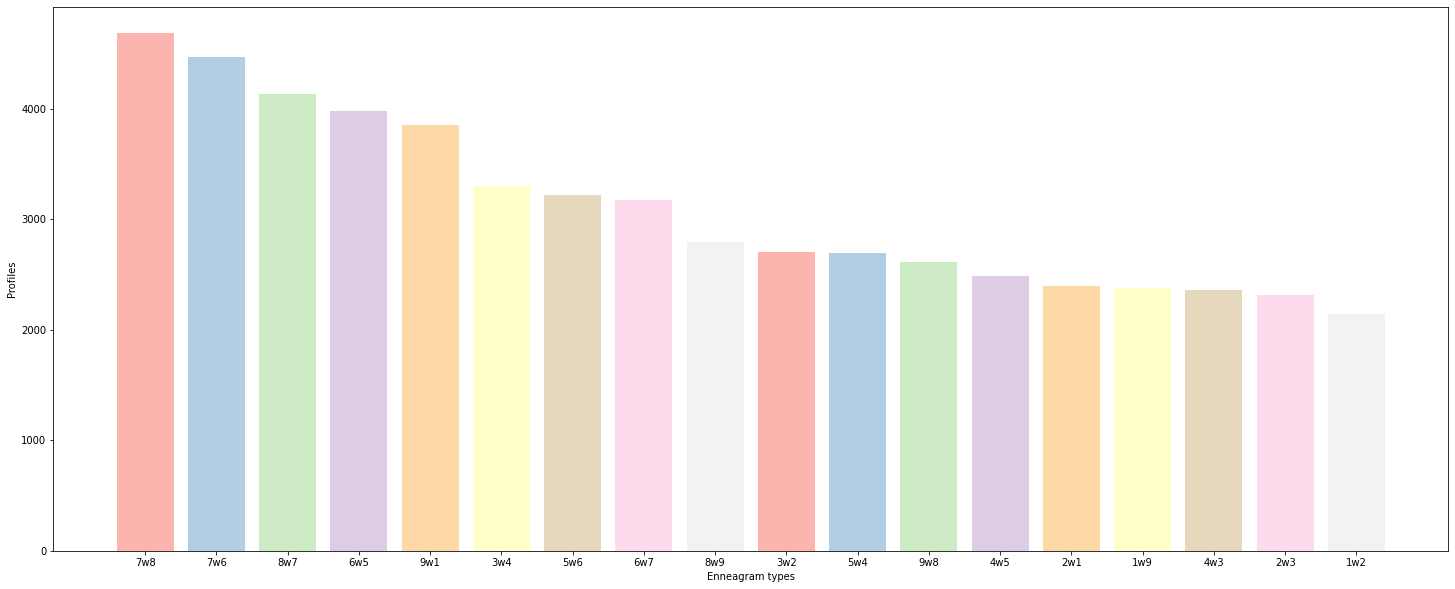

In [15]:
showBarPlot(sortedEnneagramCounter, "Enneagram")

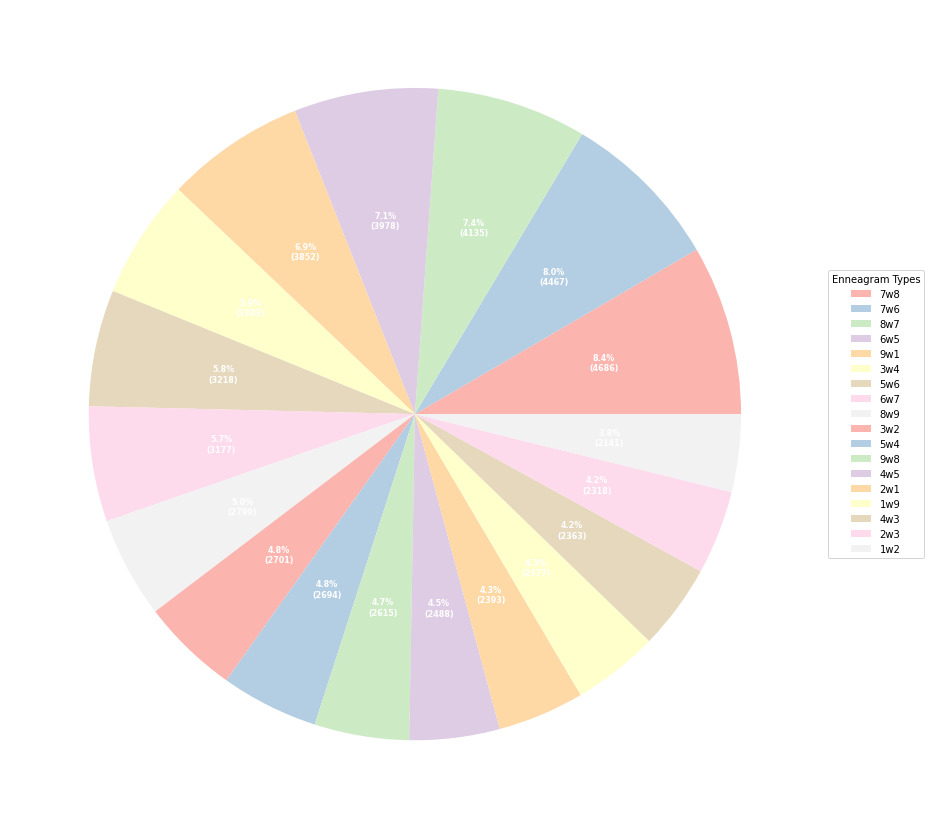

In [16]:
showPieChart(sortedEnneagramCounter, "Enneagram")

<a name="socionics"></a>

## 3. Socionics Type Distribution


In [17]:
sortedSocionicsCounter=sortedCounter(socionicsCountBegin,socionicsCountEnd)

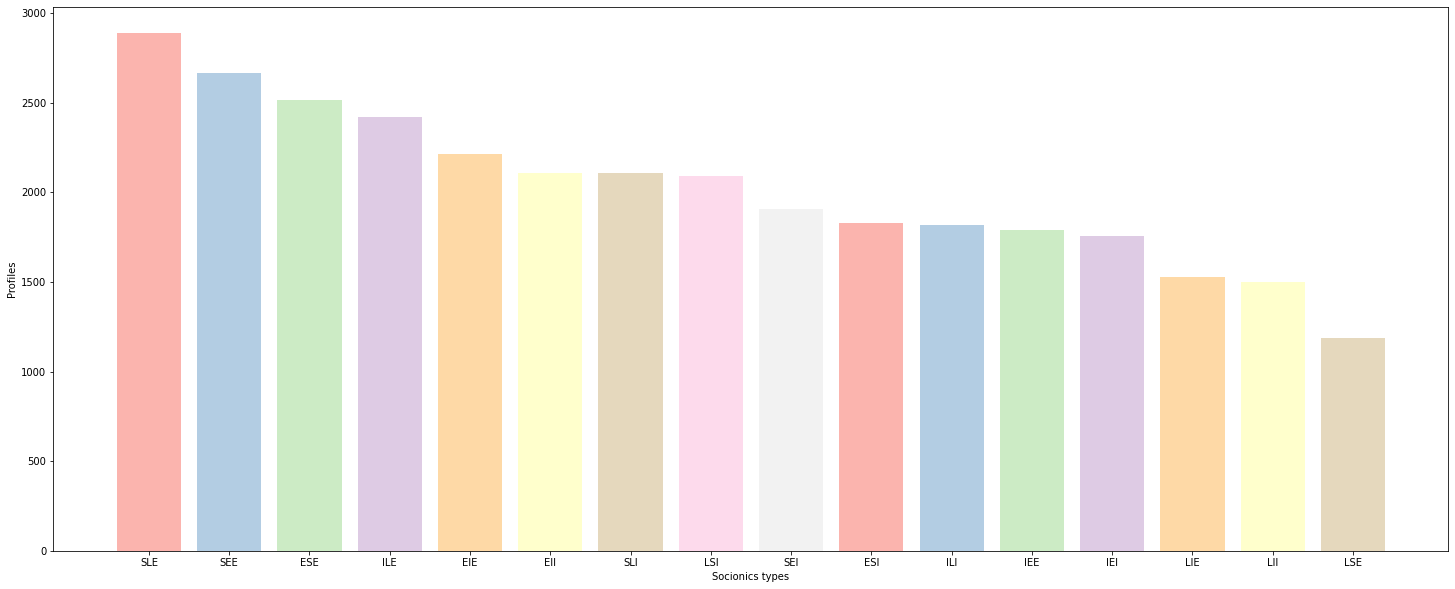

In [18]:
showBarPlot(sortedSocionicsCounter,"Socionics")

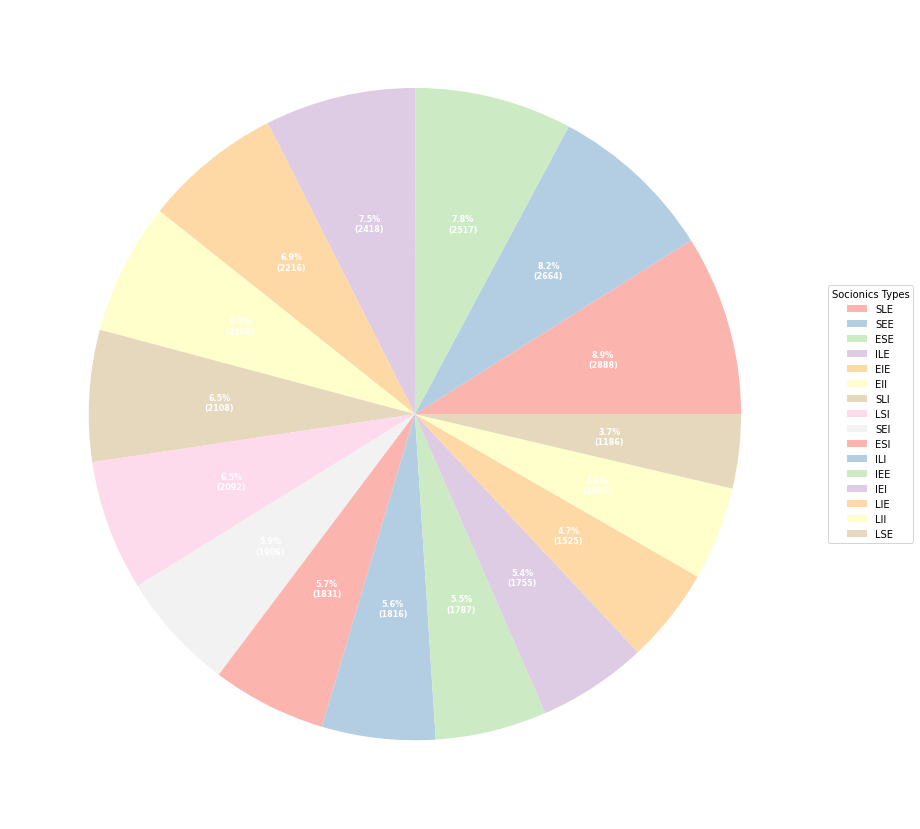

In [19]:
showPieChart(sortedSocionicsCounter,"Socionics")

<a name="instVar"></a>

## 4. Instinctual Variant Type Distribution



In [20]:
sortedInstVarCounter=sortedCounter(instVarCountBegin,instVarCountEnd)

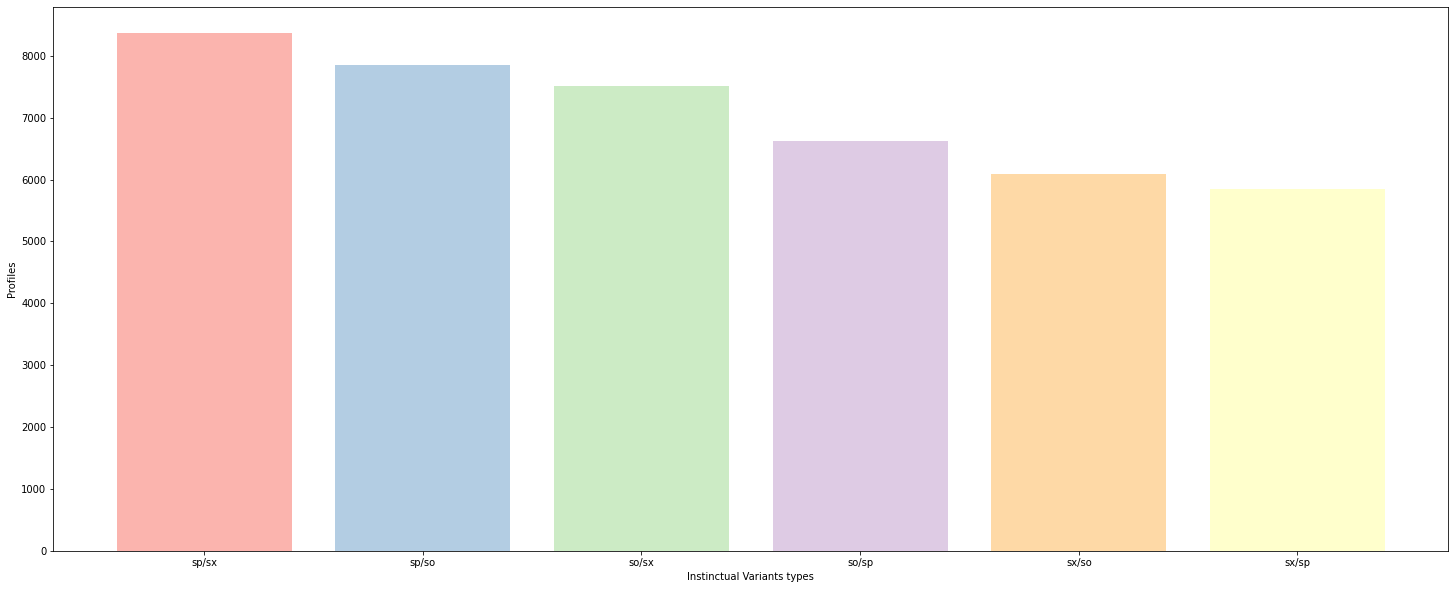

In [21]:
showBarPlot(sortedInstVarCounter,"Instinctual Variants")

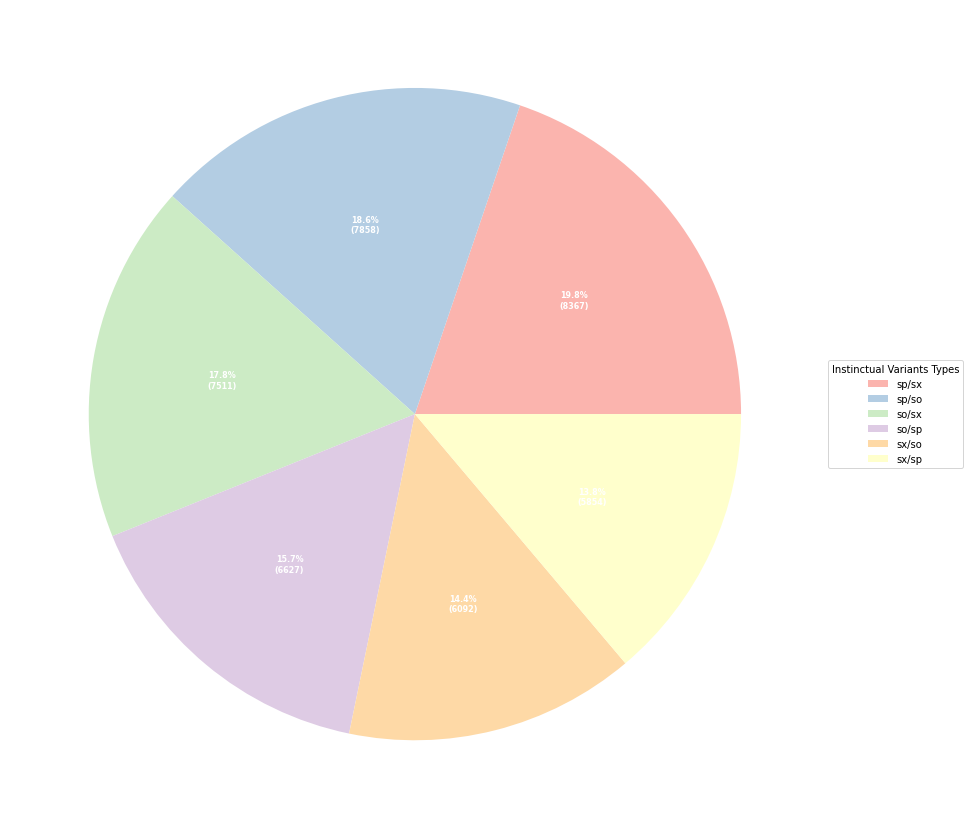

In [22]:
showPieChart(sortedInstVarCounter,"Instinctual Variants")

<a name="fourTemp"></a>

## 5. Four Temperaments Type Distribution


In [23]:
sortedFourTempCounter=sortedCounter(fourTempCountBegin,fourTempCountEnd)

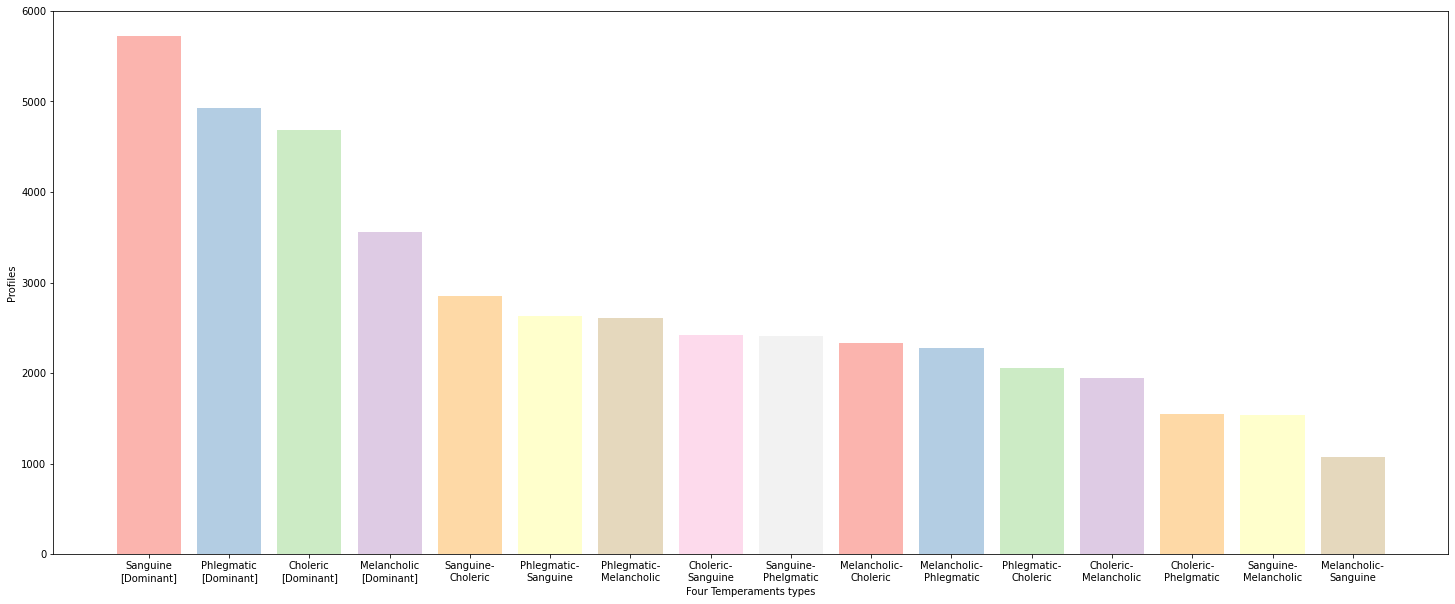

In [24]:
showBarPlot(sortedFourTempCounter,"Four Temperaments")

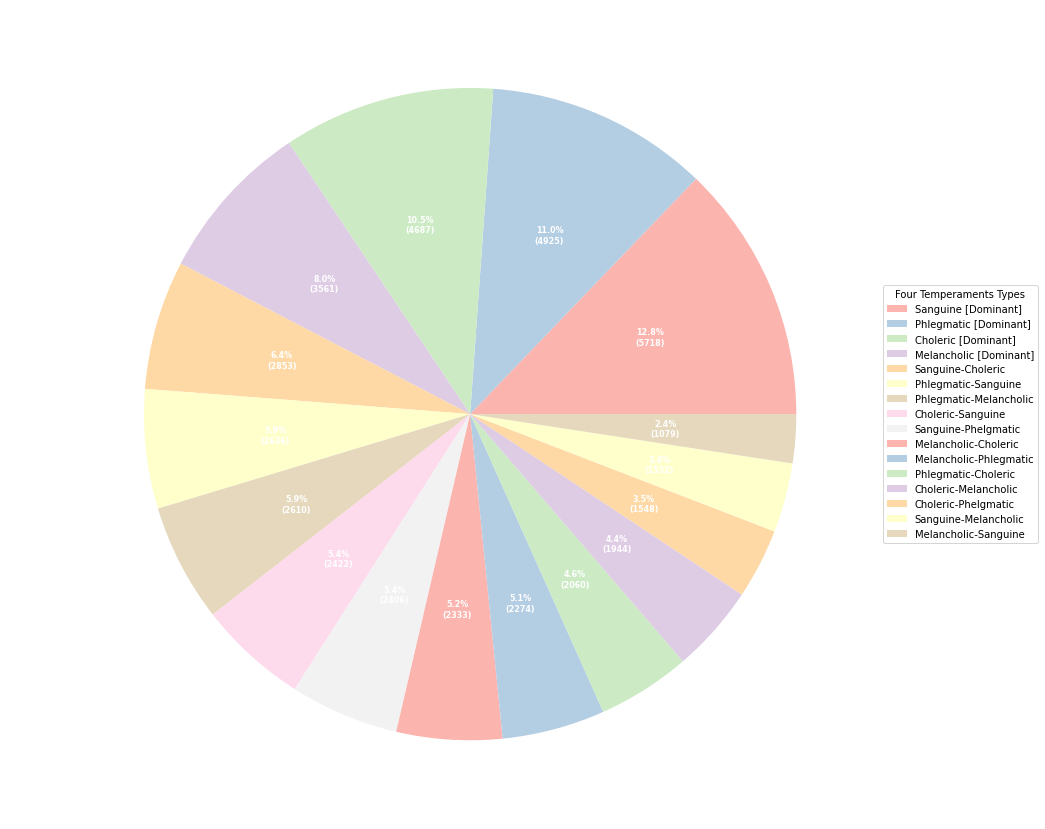

In [25]:
showPieChart(sortedFourTempCounter,"Four Temperaments")

<a name="attPsych"></a>

## 6. Attitudinal Psyche Type Distribution


In [26]:
sortedAttPsychCounter=sortedCounter(attPsychCountBegin,attPsychCountEnd)

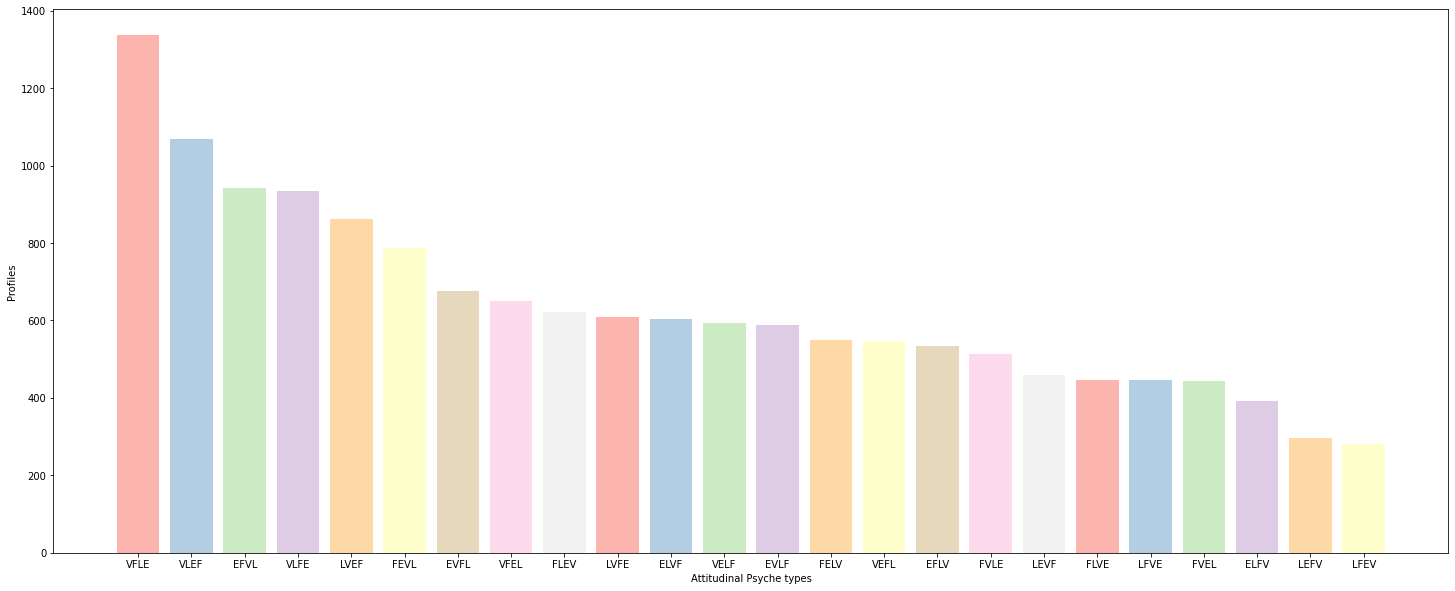

In [27]:
showBarPlot(sortedAttPsychCounter,"Attitudinal Psyche")

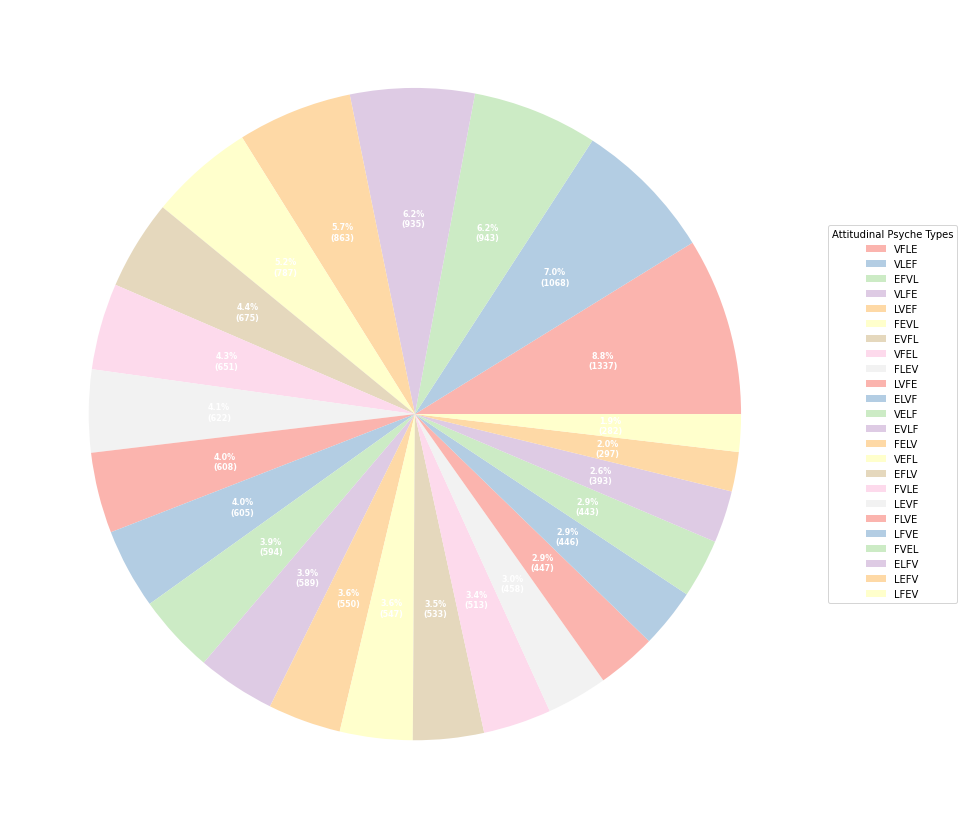

In [31]:
showPieChart(sortedAttPsychCounter,"Attitudinal Psyche")

<a name="bigFive"></a>

## 7. Big Five (SLOAN) Type Distribution


In [28]:
sortedBigFiveCounter=sortedCounter(bigFiveCountBegin,bigFiveCountEnd)

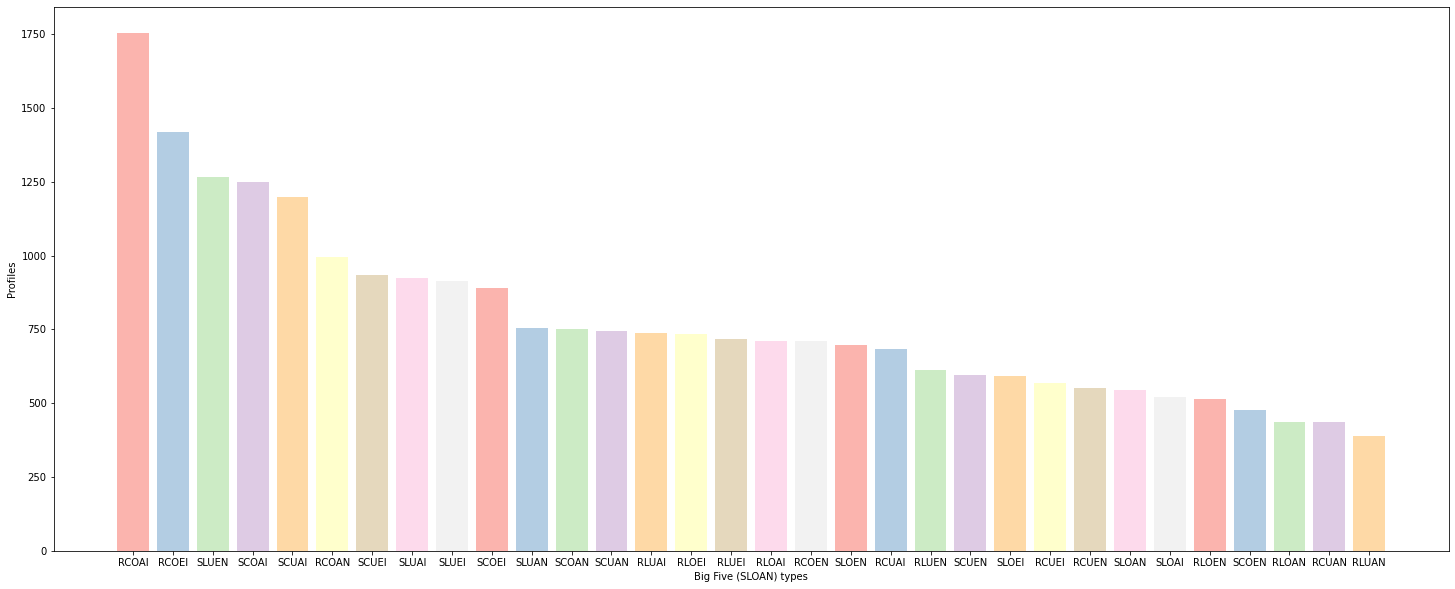

In [29]:
showBarPlot(sortedBigFiveCounter,"Big Five (SLOAN)")

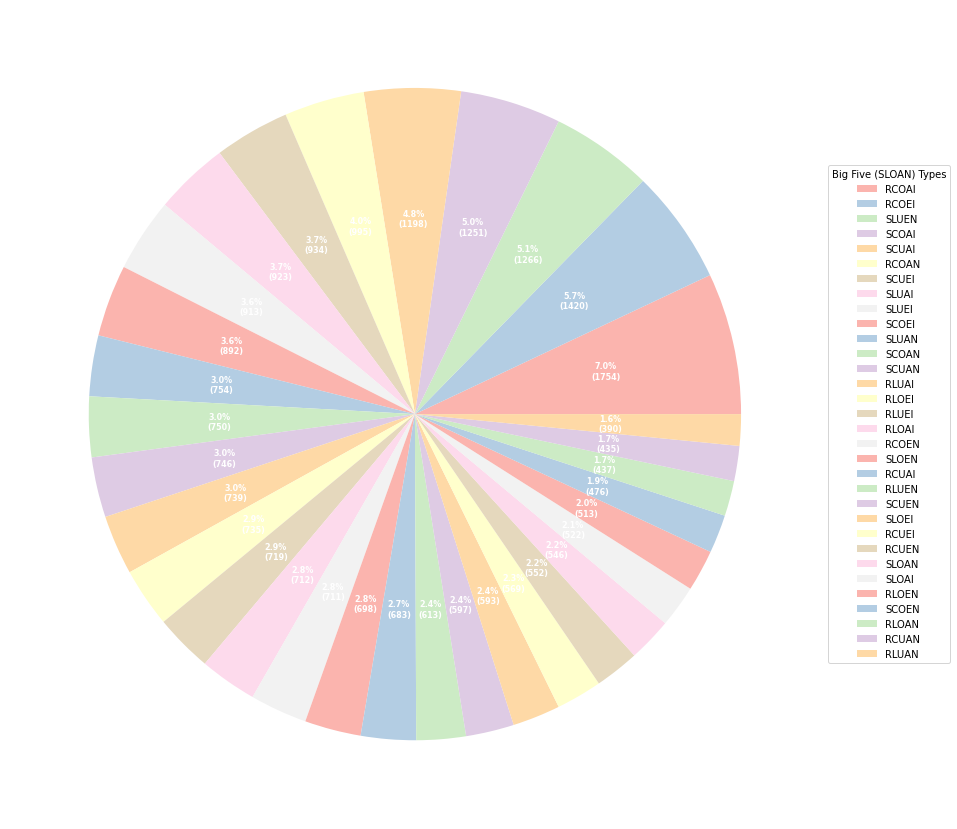

In [30]:
showPieChart(sortedBigFiveCounter,"Big Five (SLOAN)")